1000
1000


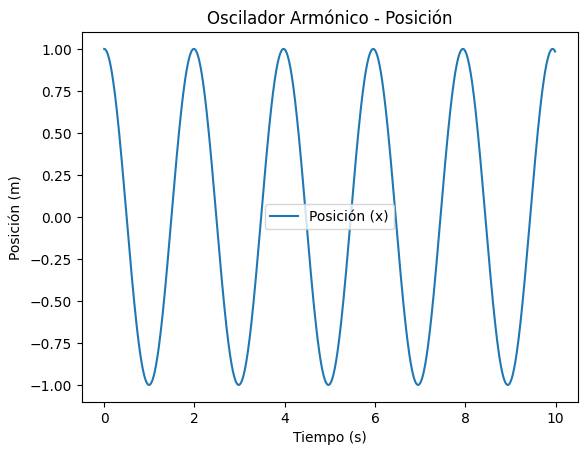

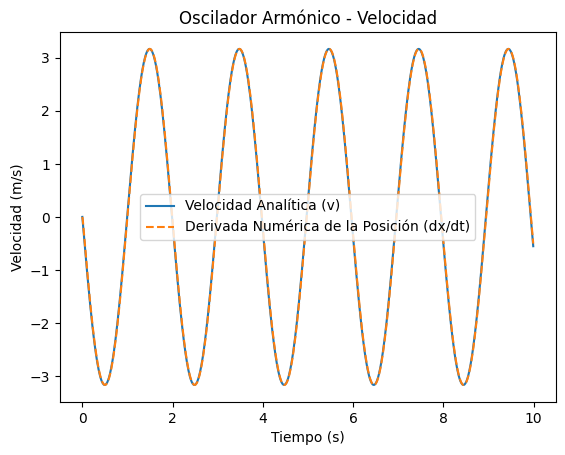

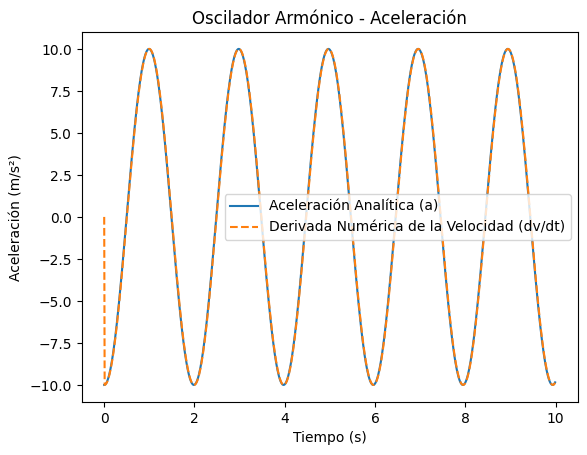

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = 1.0      # Masa (kg)
k = 10.0     # Constante del resorte (N/m)
x0 = 1.0     # Posición inicial (m)
v0 = 0.0     # Velocidad inicial (m/s)

# Calcular la frecuencia angular
omega_0 = np.sqrt(k / m)

# Intervalo de tiempo
T = 10.0             # Tiempo total de simulación (s)
dt = 0.01            # Paso de tiempo (s)
t = np.arange(0, T, dt)

# Calcular la posición en cada instante de tiempo
x = x0 * np.cos(omega_0 * t) + (v0 / omega_0) * np.sin(omega_0 * t)

# Calcular la velocidad analítica
v = -x0 * omega_0 * np.sin(omega_0 * t) + (v0) * np.cos(omega_0 * t)

# Derivar numéricamente la posición manualmente
x_deriv = np.zeros(len(t))
for i in range(1, len(t)):
    x_deriv[i] = (x[i] - x[i-1]) / dt
print(len(x_deriv))
print(len(x))
# Calcular la aceleración analítica
a = -x0 * omega_0**2 * np.cos(omega_0 * t) - (v0 * omega_0) * np.sin(omega_0 * t)

# Derivar numéricamente la velocidad manualmente
v_deriv = np.zeros(len(t))
for i in range(1, len(t)):
    v_deriv[i] = (v[i] - v[i-1]) / dt

# Graficar la posición
plt.figure()
plt.plot(t, x, label='Posición (x)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Oscilador Armónico - Posición')
plt.legend()
plt.show()

# Graficar la velocidad analítica y la derivada numérica
plt.figure()
plt.plot(t, v, label='Velocidad Analítica (v)')
plt.plot(t, x_deriv, '--', label='Derivada Numérica de la Posición (dx/dt)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Oscilador Armónico - Velocidad')
plt.legend()
plt.show()

# Graficar la aceleración analítica y la derivada numérica de la velocidad
plt.figure()
plt.plot(t, a, label='Aceleración Analítica (a)')
plt.plot(t, v_deriv, '--', label='Derivada Numérica de la Velocidad (dv/dt)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s²)')
plt.title('Oscilador Armónico - Aceleración')
plt.legend()
plt.show()

In [2]:
xx = x ** 2

# Crear array xx_deriv
xv = x*x_deriv

# Crear el array de unos (de la misma longitud que x)
ones = np.ones_like(x)

omega = np.column_stack((ones, x, xx, xv))

In [3]:
# Calcular la pseudoinversa de la matriz
omega_pinv = np.linalg.pinv(omega)

print("Matriz original omega_pinv:")
print(omega)
print("\nPseudoinversa de A:")
print(omega_pinv)

# Verificar la propiedad A @ A_pinv @ A ≈ A
print("\nVerificación de la propiedad A @ A_pinv @ A:")
print(np.allclose(omega @ omega_pinv @ omega, omega))

Matriz original omega_pinv:
[[ 1.          1.          1.          0.        ]
 [ 1.          0.99950004  0.99900033 -0.04997084]
 [ 1.          0.99800067  0.99600533 -0.14963773]
 ...
 [ 1.          0.99373659  0.98751242 -0.30173433]
 [ 1.          0.98970658  0.97951911 -0.39885324]
 [ 1.          0.98468694  0.96960837 -0.49427731]]

Pseudoinversa de A:
[[-9.76173084e-04 -9.72111147e-04 -9.60008814e-04 ... -9.25865772e-04
  -8.93793263e-04 -8.54061035e-04]
 [ 1.94990424e-03  1.94881735e-03  1.94570141e-03 ...  1.93721501e-03
   1.92932632e-03  1.91957136e-03]
 [ 3.90355693e-03  3.89736144e-03  3.87706452e-03 ...  3.81498328e-03
   3.75495879e-03  3.67967018e-03]
 [-3.31531954e-05 -7.33507267e-05 -1.53491475e-04 ... -2.75659858e-04
  -3.53583198e-04 -4.30078396e-04]]

Verificación de la propiedad A @ A_pinv @ A:
True


In [4]:
-omega_0**2

-10.000000000000002

In [5]:
# encontrar coeficientes con pseudoinverse obvio l2 norm
k = omega_pinv@v_deriv
k

array([-9.67844909e-03, -9.97901213e+00,  3.86882212e-02, -3.03256044e-04])

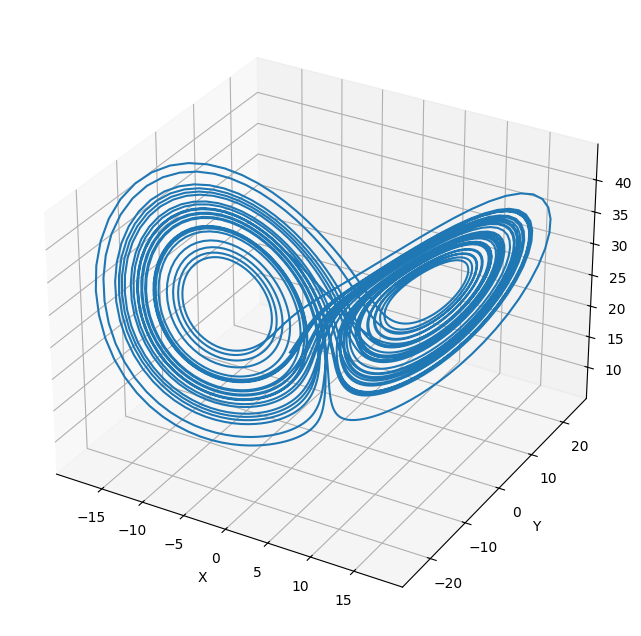

In [6]:
T = 40
dt = 0.01
t = np.arange(0, T, dt)
sigma = 10
rho = 28
beta = 8/3


x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))

# ecuaciones de lorenz
gamma = lambda x, y: sigma*(y - x)                # dx/dt
delta = lambda x, y, z: x*(rho - z) - y           # dy/dt
alfa = lambda x, y, z: x*y - beta*z             # dz/dt

#x, y, z, xx, xy, xz, yz, zz, yy

x[0] = -8
y[0] =  8
z[0] = 27

for i in range(1, len(t)):
    g1 = gamma(x[i-1],y[i-1])
    d1 = delta(x[i-1],y[i-1],z[i-1])
    a1 = alfa(x[i-1],y[i-1],z[i-1])

    g2 = gamma(x[i-1]+(dt/2)*g1, y[i-1]+(dt/2)*d1)
    d2 = delta(x[i-1]+(dt/2)*g1, y[i-1]+(dt/2)*d1, z[i-1]+(dt/2)*a1)
    a2 = alfa(x[i-1]+(dt/2)*g1, y[i-1]+(dt/2)*d1, z[i-1]+(dt/2)*a1)

    g3 = gamma(x[i-1]+(dt/2)*g2, y[i-1]+(dt/2)*d2)
    d3 = delta(x[i-1]+(dt/2)*g2, y[i-1]+(dt/2)*d2, z[i-1]+(dt/2)*a2)
    a3 = alfa(x[i-1]+(dt/2)*g2, y[i-1]+(dt/2)*d2, z[i-1]+(dt/2)*a2)

    g4 = gamma(x[i-1]+ dt*g3, y[i-1]+dt*d3)
    d4 = delta(x[i-1]+ dt*g3, y[i-1]+dt*d3, z[i-1]+dt*a3)
    a4 = alfa(x[i-1]+dt*g3, y[i-1]+dt*d3, z[i-1]+dt*a3)

    x[i] = x[i-1] + (dt/6)*(g1+2*g2+2*g3+g4)
    y[i] = y[i-1] + (dt/6)*(d1+2*d2+2*d3+d4)
    z[i] = z[i-1] + (dt/6)*(a1+2*a2+2*a3+a4)


# Graficar el espacio de fases en 3D usando matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z,)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

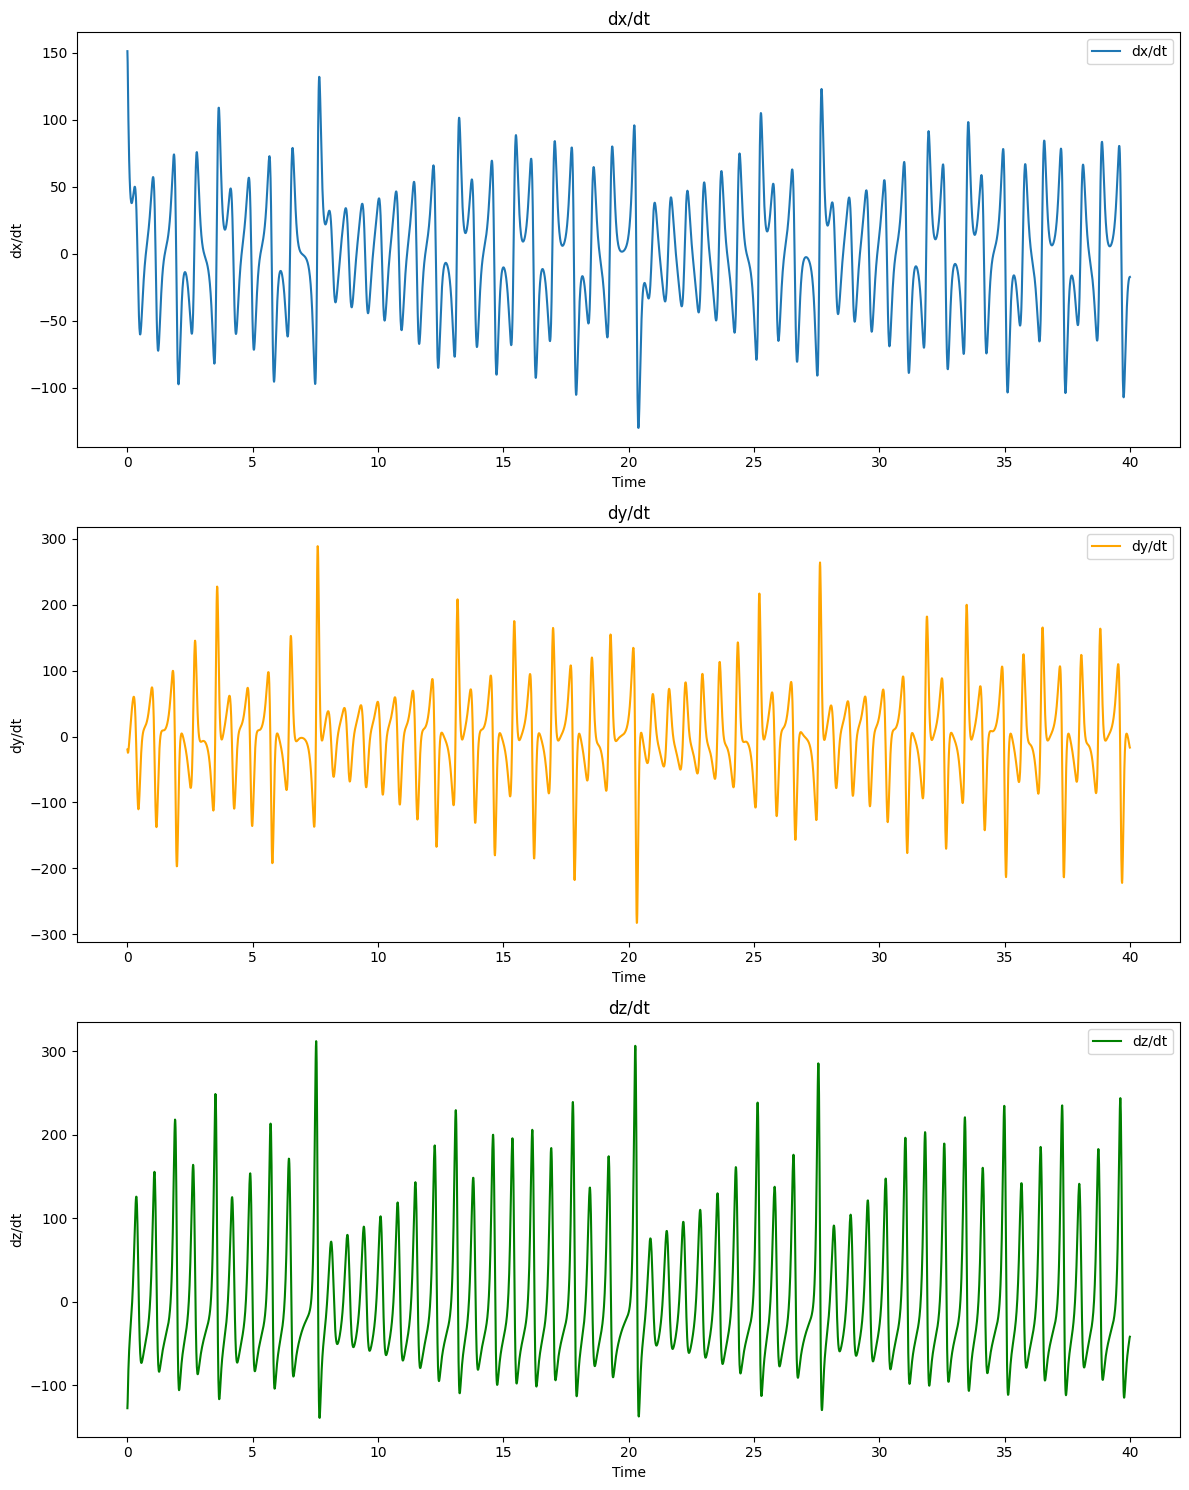

In [7]:
# Supongo que estas son las derivadas correctas del sistema
dxdt = np.gradient(x, t)
dydt = np.gradient(y, t)
dzdt = np.gradient(z, t)

fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Graficar dx/dt
axs[0].plot(t, dxdt, label='dx/dt')
axs[0].set_title('dx/dt')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('dx/dt')
axs[0].legend()

# Graficar dy/dt
axs[1].plot(t, dydt, label='dy/dt', color='orange')
axs[1].set_title('dy/dt')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('dy/dt')
axs[1].legend()

# Graficar dz/dt
axs[2].plot(t, dzdt, label='dz/dt', color='green')
axs[2].set_title('dz/dt')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('dz/dt')
axs[2].legend()

plt.tight_layout()
plt.show()

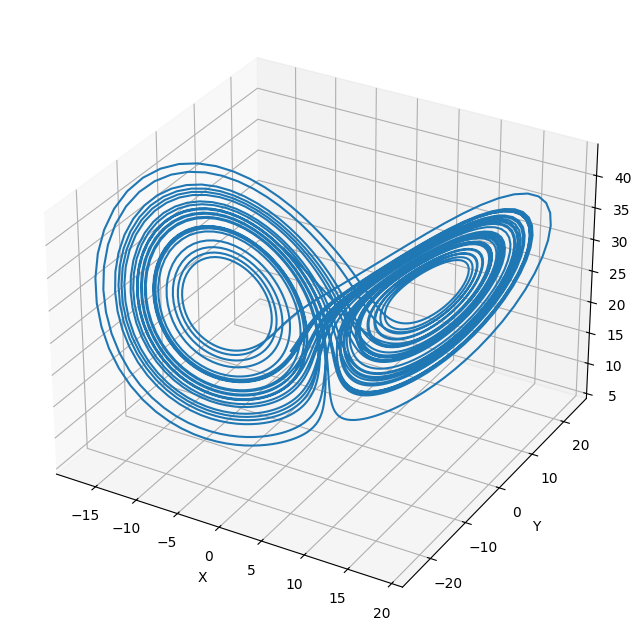

In [8]:
# nada más hice esto para comprobar que dxdt con np.gradient es correcto

# Valores iniciales
x0 = -8
y0 = 8
z0 = 27

# Inicializar arrays para x, y, z
x_num = np.zeros_like(t)
y_num = np.zeros_like(t)
z_num = np.zeros_like(t)

# Asignar las condiciones iniciales
x_num[0] = x0
y_num[0] = y0
z_num[0] = z0

# Integrar usando el método de Euler
for i in range(1, len(t)):
    x_num[i] = x_num[i-1] + dxdt[i-1] * dt
    y_num[i] = y_num[i-1] + dydt[i-1] * dt
    z_num[i] = z_num[i-1] + dzdt[i-1] * dt


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_num, y_num, z_num,)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [9]:
#Ahora que ya tengo x,y,z y sus derivadas, puedo proceder a aplicar SINDY, primero preparare
PHI = np.column_stack((dxdt, dydt, dzdt)) # mi matriz de derivadas

#preparo mis posibles soluciones será beta
xx = x*x
xy = x*y
xz = x*z
yz = y*z
zz = z*z
yy = y*y

BETA = np.column_stack((x, y, z, xx, xy, xz, yz, zz, yy))

#ahora preparo mi matriz de coeficientes a encontrar llamada C s.t BETA*C=PHI por tanto C=BETA_pinv*PHI
BETA_pinv = np.linalg.pinv(BETA)

# Verificar la propiedad A @ A_pinv @ A ≈ A
print("\nVerificar pseudoinv")
print(np.allclose(BETA @ BETA_pinv @ BETA, BETA))


Verificar pseudoinv
True


In [10]:
# encontramos la matriz de coeficientes para obtener el modelo
C = BETA_pinv@PHI
C

array([[-1.00952719e+01,  2.77482249e+01,  1.99734170e-02],
       [ 1.00646717e+01, -9.22059426e-01, -1.17513368e-02],
       [-4.34186970e-03, -6.30545083e-04, -2.62283233e+00],
       [-2.62745474e-03, -1.50964811e-03,  2.30755602e-02],
       [ 3.10661638e-03,  1.98737630e-03,  9.72412192e-01],
       [ 3.54438606e-03, -9.92826925e-01, -5.17756271e-04],
       [-2.83195169e-03, -1.29813064e-03,  3.17217738e-04],
       [ 2.46839324e-04,  8.67934182e-05, -2.12926818e-03],
       [-1.00952199e-03, -7.70827960e-04,  7.23014104e-03]])

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.04, max_iter=10000) # 0.04 se ajustó bien

# Ajustar el modelo a los datos
lasso.fit(BETA, PHI)

# Obtener los coeficientes
coeficientes = lasso.coef_  # Esto es el vector de coeficientes C
coeficientes = coeficientes.T
intercepto = lasso.intercept_  # Esto es el término de intersección (no necesario para multiplicar)

# Ver el tipo y las dimensiones de los coeficientes
print("Tipo de coeficientes:", type(coeficientes))
print("Dimensiones de coeficientes:", coeficientes.shape)
print("Coeficientes:", coeficientes)

Tipo de coeficientes: <class 'numpy.ndarray'>
Dimensiones de coeficientes: (9, 3)
Coeficientes: [[-9.85103836e+00  2.75222634e+01  0.00000000e+00]
 [ 9.91062520e+00 -7.79081332e-01 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -2.44512317e+00]
 [-1.26970837e-05 -1.57500584e-03  4.36177206e-02]
 [ 2.46349963e-04  2.19372228e-03  9.55835600e-01]
 [-3.27554861e-03 -9.86502996e-01  7.94473930e-05]
 [ 1.48581293e-03 -5.32185106e-03 -7.37942964e-05]
 [-1.57861743e-05  7.56708644e-05 -7.13592663e-03]
 [-1.40391145e-04 -9.03700700e-04  9.68254630e-03]]


In [23]:
import gradio as gr
import numpy as np
from pysindy import SINDy  # Assuming you are using PySINDy

# Load your custom SINDy implementation or model setup here
# Placeholder function for SINDy model

def sindy_identification(data, time_step):
    try:
        model = SINDy()
        model.fit(data, t=time_step)
        equations = model.print()
        return f"Identified Equations:\n{equations}"
    except Exception as e:
        return f"Error: {str(e)}"

# Interface components
def process_data(input_data, time_step):
    try:
        data = np.array(eval(input_data))
        time_step = float(time_step)
        result = sindy_identification(data, time_step)
        return result
    except Exception as e:
        return f"Error processing data: {str(e)}"

# Gradio Interface
data_input = gr.Textbox(label="Input Data (as a 2D Python list)",
                        placeholder="[[x1, y1, z1], [x2, y2, z2], ...]")
time_step_input = gr.Textbox(label="Time Step",
                             placeholder="e.g., 0.01")
result_output = gr.Textbox(label="SINDy Output", interactive=False)

interface = gr.Interface(
    fn=process_data,
    inputs=[data_input, time_step_input],
    outputs=result_output,
    title="SINDy Equation Identification",
    description="Provide the system responses as a 2D Python list and the time step to identify the governing equations using the SINDy method."
)

if __name__ == "__main__":
    interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b9e6b10b16155835fa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [24]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pysindy import SINDy  # Asegúrate de tener PySINDy instalado

# Función para resolver el oscilador armónico

def oscilador_armonico(m, k, x0, v0, dt, steps):
    """Simula un oscilador armónico simple.
    Parámetros:
    m: masa (kg)
    k: constante del resorte (N/m)
    x0: posición inicial (m)
    v0: velocidad inicial (m/s)
    dt: paso de tiempo (s)
    steps: número de pasos de simulación

    Retorna:
    tiempos, posiciones y velocidades
    """
    omega = np.sqrt(k / m)
    tiempos = np.linspace(0, steps * dt, steps)
    posiciones = x0 * np.cos(omega * tiempos) + (v0 / omega) * np.sin(omega * tiempos)
    velocidades = -x0 * omega * np.sin(omega * tiempos) + v0 * np.cos(omega * tiempos)
    return tiempos, posiciones, velocidades

# Función para graficar la simulación dinámica

def graficar_simulacion(tiempos, posiciones):
    fig, ax = plt.subplots()
    ax.set_xlim((min(tiempos), max(tiempos)))
    ax.set_ylim((min(posiciones) - 1, max(posiciones) + 1))

    ax.set_xlabel("Tiempo (s)")
    ax.set_ylabel("Posición (m)")
    ax.set_title("Simulación del Oscilador Armónico")

    line, = ax.plot([], [], lw=2)
    scatter, = ax.plot([], [], 'ro')

    def init():
        line.set_data([], [])
        scatter.set_data([], [])
        return line, scatter

    def update(frame):
        line.set_data(tiempos[:frame], posiciones[:frame])
        scatter.set_data(tiempos[frame - 1], posiciones[frame - 1])
        return line, scatter

    anim = FuncAnimation(fig, update, frames=len(tiempos), init_func=init, blit=True, interval=dt * 1000)
    return anim

# Interfaz con Gradio

def simulacion_dinamica(masa, k, x0, v0, dt, steps):
    masa, k, x0, v0, dt, steps = map(float, [masa, k, x0, v0, dt, steps])
    steps = int(steps)

    tiempos, posiciones, _ = oscilador_armonico(masa, k, x0, v0, dt, steps)
    anim = graficar_simulacion(tiempos, posiciones)

    # Guardar la animación como GIF temporal
    anim.save("simulacion.gif", writer="pillow")
    return "simulacion.gif"

# Gradio Inputs y Outputs
inputs = [
    gr.Number(label="Masa (kg)", value=1.0),
    gr.Number(label="Constante del resorte (N/m)", value=10.0),
    gr.Number(label="Posición inicial (m)", value=1.0),
    gr.Number(label="Velocidad inicial (m/s)", value=0.0),
    gr.Number(label="Paso de tiempo (s)", value=0.05),
    gr.Number(label="Número de pasos", value=200)
]

outputs = gr.Image(label="Simulación del Oscilador Armónico")

graphic_interface = gr.Interface(
    fn=simulacion_dinamica,
    inputs=inputs,
    outputs=outputs,
    title="Simulación del Oscilador Armónico",
    description="Genera una simulación dinámica de un oscilador armónico simple, mostrando su posición a lo largo del tiempo."
)

if __name__ == "__main__":
    graphic_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://71e1e11e84a90ac254.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [26]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

def oscilador_armonico(m, k, x0, v0, dt, steps):
    omega = np.sqrt(k / m)
    tiempos = np.linspace(0, steps * dt, steps)
    posiciones = x0 * np.cos(omega * tiempos) + (v0 / omega) * np.sin(omega * tiempos)
    velocidades = -x0 * omega * np.sin(omega * tiempos) + v0 * np.cos(omega * tiempos)
    return tiempos, posiciones, velocidades

def graficar_simulacion_completa(tiempos, posiciones):
    fig, axes = plt.subplots(2, 1, figsize=(6, 8))

    # Configuración de la gráfica de posición vs tiempo
    ax1 = axes[0]
    ax1.set_xlim((min(tiempos), max(tiempos)))
    ax1.set_ylim((min(posiciones) - 1, max(posiciones) + 1))
    ax1.set_xlabel("Tiempo (s)")
    ax1.set_ylabel("Posición (m)")
    ax1.set_title("Posición vs Tiempo")
    line, = ax1.plot([], [], lw=2)
    scatter, = ax1.plot([], [], 'ro')

    # Configuración de la representación física del sistema
    ax2 = axes[1]
    ax2.set_xlim((-2, 2))
    ax2.set_ylim((-1, 1))
    ax2.set_title("Sistema Masa-Resorte")
    ax2.axis("off")
    resorte, = ax2.plot([], [], lw=2, color="blue")
    bloque = patches.Rectangle((0, -0.25), 0.5, 0.5, fc="gray")
    ax2.add_patch(bloque)

    def init():
        line.set_data([], [])
        scatter.set_data([], [])
        resorte.set_data([], [])
        bloque.set_xy((-0.25, -0.25))
        return line, scatter, resorte, bloque

    def update(frame):
        # Actualizar gráfica de posición vs tiempo
        line.set_data(tiempos[:frame], posiciones[:frame])
        scatter.set_data(tiempos[frame - 1], posiciones[frame - 1])

        # Actualizar sistema físico
        x_bloque = posiciones[frame]
        resorte_x = np.linspace(-1, x_bloque, 100)
        resorte_y = 0.1 * np.sin(10 * np.pi * resorte_x)
        resorte.set_data(resorte_x, resorte_y)
        bloque.set_xy((x_bloque - 0.25, -0.25))
        return line, scatter, resorte, bloque

    anim = FuncAnimation(fig, update, frames=len(tiempos), init_func=init, blit=True, interval=50)
    return anim

def simulacion_dinamica(masa, k, x0, v0, dt, steps):
    masa, k, x0, v0, dt, steps = map(float, [masa, k, x0, v0, dt, steps])
    steps = int(steps)

    tiempos, posiciones, _ = oscilador_armonico(masa, k, x0, v0, dt, steps)
    anim = graficar_simulacion_completa(tiempos, posiciones)

    # Guardar la animación como GIF temporal
    anim.save("simulacion_completa.gif", writer="pillow")
    return "simulacion_completa.gif"

inputs = [
    gr.Number(label="Masa (kg)", value=1.0),
    gr.Number(label="Constante del resorte (N/m)", value=10.0),
    gr.Number(label="Posición inicial (m)", value=1.0),
    gr.Number(label="Velocidad inicial (m/s)", value=0.0),
    gr.Number(label="Paso de tiempo (s)", value=0.05),
    gr.Number(label="Número de pasos", value=200)
]

outputs = gr.Image(label="Simulación del Oscilador Armónico y Sistema Masa-Resorte")

graphic_interface = gr.Interface(
    fn=simulacion_dinamica,
    inputs=inputs,
    outputs=outputs,
    title="Simulación del Oscilador Armónico y Sistema Masa-Resorte",
    description="Genera una simulación dinámica del oscilador armónico y su sistema físico correspondiente."
)

if __name__ == "__main__":
    graphic_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://70524ac5e2747afb1a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [25]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

# Función para resolver el sistema de Lorenz
def sistema_lorenz(t, estado, sigma, rho, beta):
    x, y, z = estado
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Resolver el sistema de Lorenz
def resolver_lorenz(sigma, rho, beta, estado_inicial, t_max, dt):
    tiempos = np.arange(0, t_max, dt)
    solucion = solve_ivp(sistema_lorenz, [0, t_max], estado_inicial, t_eval=tiempos, args=(sigma, rho, beta))
    return tiempos, solucion.y

# Función para graficar la simulación dinámica
def graficar_lorenz(tiempos, datos):
    x, y, z = datos
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim((min(x), max(x)))
    ax.set_ylim((min(y), max(y)))
    ax.set_zlim((min(z), max(z)))

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Simulación del Sistema de Lorenz")

    line, = ax.plot([], [], [], lw=2)
    scatter, = ax.plot([], [], [], 'ro')

    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        scatter.set_data([], [])
        scatter.set_3d_properties([])
        return line, scatter

    def update(frame):
        line.set_data(x[:frame], y[:frame])
        line.set_3d_properties(z[:frame])
        scatter.set_data(x[frame - 1:frame], y[frame - 1:frame])
        scatter.set_3d_properties(z[frame - 1:frame])
        return line, scatter

    anim = FuncAnimation(fig, update, frames=len(tiempos), init_func=init, blit=True, interval=dt * 1000)
    return anim

# Interfaz con Gradio
def simulacion_lorenz(sigma, rho, beta, x0, y0, z0, t_max, dt):
    sigma, rho, beta, t_max, dt = map(float, [sigma, rho, beta, t_max, dt])
    estado_inicial = [float(x0), float(y0), float(z0)]

    tiempos, datos = resolver_lorenz(sigma, rho, beta, estado_inicial, t_max, dt)
    anim = graficar_lorenz(tiempos, datos)

    # Guardar la animación como GIF temporal
    anim.save("simulacion_lorenz.gif", writer="pillow")
    return "simulacion_lorenz.gif"

# Gradio Inputs y Outputs
inputs = [
    gr.Number(label="Sigma", value=10.0),
    gr.Number(label="Rho", value=28.0),
    gr.Number(label="Beta", value=2.667),
    gr.Number(label="X0 (estado inicial)", value=1.0),
    gr.Number(label="Y0 (estado inicial)", value=1.0),
    gr.Number(label="Z0 (estado inicial)", value=1.0),
    gr.Number(label="Tiempo máximo (s)", value=25.0),
    gr.Number(label="Paso de tiempo (s)", value=0.01)
]

outputs = gr.Image(label="Simulación del Sistema de Lorenz")

graphic_interface = gr.Interface(
    fn=simulacion_lorenz,
    inputs=inputs,
    outputs=outputs,
    title="Simulación del Sistema de Lorenz",
    description="Genera una simulación dinámica del sistema de Lorenz, mostrando su trayectoria en el espacio tridimensional.")

if __name__ == "__main__":
    graphic_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d5fd038c2571a83ae7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
